# 6. Clustering Song Lyrics by Similarity of Words / Popularity

Here, I import a wide variety of different libraries and functions that will allow me to complete this project.

In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [3]:
import spacy
import en_core_web_md
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import InterclusterDistance

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Read in Ordered_Songlist

In this section, I read in ordered_songlist. This is the DataFrame with all of the details I want to analyze, particularly lyrics and sentiment analyses for those lyrics.

In [4]:
ordered_songlist = pd.read_csv('ordered_songlist.csv')

In [5]:
ordered_songlist.head(10)

,index,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,popularity,lyrics
0,0,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.746,0.690,11,-7.956,1,0.1640,0.000000,0.1010,0.497,89.977,181733,4,0.2470,96.0,dababy woo woo pull pull pull baby pull pull p...
1,1,Justin Bieber,Holy,Holy (feat. Chance The Rapper),5u1n1kITHCxxp8twBcZxWy,0.673,0.704,6,-8.056,1,0.3600,0.000000,0.0898,0.372,86.919,212093,4,0.1960,94.0,justin bieber hear lot sinners saint might riv...
2,2,Pop Smoke,Shoot For The Stars Aim For The Moon,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,0.709,0.548,10,-8.493,1,0.3530,0.000002,0.1330,0.543,83.995,160000,4,0.6500,91.0,uh shawty jogging every morning every morning ...
3,3,Ariana Grande,Stuck with U,Stuck with U (with Justin Bieber),4HBZA5flZLE435QTztThqH,0.597,0.450,8,-6.658,1,0.0418,0.000000,0.3820,0.537,178.765,228482,3,0.2230,90.0,ariana grande mmm hey fun stuck ariana grande ...
4,4,salem ilese,Mad at Disney,Mad at Disney,7aGyRfJWtLqgJaZoG9lJhE,0.738,0.621,0,-7.313,1,0.0486,0.000007,0.6920,0.715,113.968,136839,4,0.4240,88.0,mad disney disney tricked tricked wishing shoo...
5,5,Lele Pons,Se Te Nota (with Guaynaa),Se Te Nota (with Guaynaa),11EnQRgRMJwMAesfkB5pnu,0.905,0.686,0,-3.152,1,0.0664,0.000000,0.2660,0.963,103.013,155825,4,0.0907,87.0,hit different sza del mar ozuna lithuania feat...
6,6,Doja Cat,Hot Pink,Say So,3Dv1eDb0MEgF93GpLXlucZ,0.787,0.673,11,-4.577,0,0.1580,0.000004,0.0904,0.786,110.962,237893,4,0.2560,87.0,day night morning keep moment known even notic...
7,7,Shawn Mendes,Wonder,Wonder,5KCbr5ndeby4y4ggthdiAb,0.333,0.637,1,-4.904,0,0.0581,0.000018,0.1490,0.132,139.898,172693,4,0.1310,87.0,wonder real speak truth filter wonder nice liv...
8,9,Sam Smith,Diamonds,Diamonds,5hvwx5i67IwnCkjl9VHkNv,0.653,0.667,10,-6.764,0,0.0423,0.000000,0.1070,0.556,104.181,213869,4,0.1540,86.0,diamonds diamonds diamonds diamonds diamonds d...
9,10,Ashnikko,Daisy,Daisy,0AUvWawuP0ibk4SQ3sIZjk,0.834,0.663,8,-6.143,1,0.1330,0.000000,0.3720,0.774,121.876,146523,4,0.2350,86.0,see bratty pet kitty call catty make man call ...


# Testing SpaCy Methods and Syntax for NLP

In [6]:
nlp = en_core_web_md.load()

In [7]:
[w for w in nlp("My name is James.")]

[My, name, is, James, .]

In [8]:
ordered_songlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             695 non-null    int64  
 1   artist            695 non-null    object 
 2   album             695 non-null    object 
 3   track_name        695 non-null    object 
 4   track_id          695 non-null    object 
 5   danceability      695 non-null    float64
 6   energy            695 non-null    float64
 7   key               695 non-null    int64  
 8   loudness          695 non-null    float64
 9   mode              695 non-null    int64  
 10  speechiness       695 non-null    float64
 11  instrumentalness  695 non-null    float64
 12  liveness          695 non-null    float64
 13  valence           695 non-null    float64
 14  tempo             695 non-null    float64
 15  duration_ms       695 non-null    int64  
 16  time_signature    695 non-null    int64  
 1

In [9]:
ordered_songlist.dropna(inplace=True)

# Converting Lyrics in Ordered_Songlist into Vectors

Using SpaCy, I convert the 300 most common lyrics in each of the cleaned song lyrics into vectors. These vectors become plotted along an axis.

In [10]:
vector_list = []
for lyrics in ordered_songlist['lyrics']:
    doc = nlp((lyrics))
    vector_list.append(doc.vector)

In [11]:
len(vector_list[0])

300

In [12]:
len(vector_list)

619

In [13]:
ordered_songlist['vector_list'] = vector_list

In [14]:
ordered_songlist['vector_list'].head(20)

0     [-0.07924896, 0.044380162, -0.04739243, -0.141...
1     [-0.072280824, -0.020497937, -0.10887815, 0.00...
2     [-0.029653894, 0.13314947, -0.21061505, -0.026...
3     [-0.018689264, 0.015469632, -0.117349945, -0.0...
4     [-0.084191434, 0.18678394, -0.16756755, -0.130...
5     [-0.09335203, 0.0997746, 0.015720373, -0.06948...
6     [-0.02648013, 0.10285527, -0.19794959, -0.0398...
7     [-0.005292415, 0.15261565, -0.1936357, -0.1242...
8     [-0.12089628, 0.19775973, -0.059171453, -0.067...
9     [-0.14807945, -0.063976005, -0.13776779, -0.10...
10    [0.19732349, -0.100806355, -0.06590902, 0.1655...
11    [-0.072505325, 0.12974066, -0.0069515747, -0.0...
12    [-0.08819942, 0.22044694, -0.072751835, -0.004...
13    [-0.16550758, 0.019730877, -0.20719188, -0.104...
14    [-0.10033582, 0.029569222, -0.14779125, -0.022...
15    [-0.10383225, 0.10170482, -0.21559165, -0.0616...
16    [-0.2589823, -0.011540236, -0.006826276, -0.07...
17    [-0.09113714, 0.11546018, -0.13547496, -0.

In [15]:
vector_list[0];

In [16]:
X = vector_list

# Cluster Modeling (Unsupervised Machine Learning) with KMeans from SK-Learn

I use KMeans to cluster together the related vectors into 5 different clusters.

In [17]:
km = KMeans(n_clusters=5, random_state=42)
# I do: Fit a k-means clustering model
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [18]:
km.cluster_centers_;

In [19]:
km.labels_

array([2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 1, 2, 0,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 4, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 4, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1,
       4, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4,

In [20]:
km.predict(X)

array([2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 1, 2, 0,
       2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 4, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 4, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1,
       4, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 4,

In [21]:
ordered_songlist['cluster'] = km.labels_

In [22]:
ordered_songlist[['artist','track_name','popularity','cluster']];

In [23]:
# The mean values for EACH CLUSTER of our data
ordered_songlist.groupby('cluster').mean()

,index,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,popularity
cluster,,,,,,,,,,,,,,,
0,323.661850,0.608425,0.629488,5.375723,-7.279277,0.641618,0.087392,0.034148,0.167575,0.465687,121.789882,205606.644509,3.947977,0.249947,47.777457
1,413.500000,0.619324,0.606662,5.081081,-7.728135,0.608108,0.106011,0.037292,0.180705,0.495476,124.241216,200421.486486,3.878378,0.218864,37.121622
2,317.497143,0.672337,0.615560,5.234286,-7.158423,0.600000,0.127280,0.024213,0.169193,0.515994,123.004709,192619.491429,3.965714,0.226967,48.651429
3,323.000000,0.731400,0.585600,5.700000,-7.297300,0.300000,0.115670,0.063009,0.133410,0.407900,107.115000,200545.700000,3.900000,0.289185,48.700000
4,342.142857,0.672500,0.555571,4.785714,-8.160214,0.714286,0.084521,0.222105,0.188721,0.567429,119.857143,174131.500000,3.857143,0.312907,47.357143


In [24]:
centroids = ordered_songlist.groupby(by='cluster').mean()

# Visualizing the Clusters of Vectors Created by KMeans

Here, we visualize the clusters with a visualizer engineered with the advice of Data Scientist Josh Mizraji. We find that 0, 1, and 2 (all clusters related to pop) are very related lyrically. 1 (the model more corresponding with rock) is much less represented as similar to 0 and 1. 3 and 4 are very different, indicating they'd be much less popular based on lyrics.

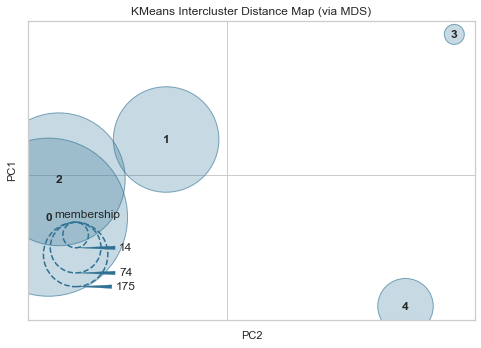

In [25]:
#Visualizer help provided by the incomparable Josh Mizraji
visualizer = InterclusterDistance(km)

visualizer.fit(lyrics) # Fit the data to the visualizer
visualizer.show(); # Finalize and render

In [27]:
ordered_songlist[ordered_songlist['cluster'] == 0][['artist','track_name','popularity','lyrics','cluster']]

,artist,track_name,popularity,lyrics,cluster
4,salem ilese,Mad at Disney,88.0,mad disney disney tricked tricked wishing shoo...,0
6,Doja Cat,Say So,87.0,day night morning keep moment known even notic...,0
7,Shawn Mendes,Wonder,87.0,wonder real speak truth filter wonder nice liv...,0
15,ZAYN,Better,84.0,hope leave good vibes living room floor hurts ...,0
19,Dua Lipa,Break My Heart,83.0,always first goodbye love lose hundred million...,0
...,...,...,...,...,...
684,The Smashing Pumpkins,Bullet With Butterfly Wings,0.0,world vampire sent drain secret destroyers hol...,0
685,The Offspring,"You're Gonna Go Far, Kid",0.0,show lie getting better time turning art hard ...,0
687,Snow Patrol,Run - Revised Album Version,0.0,sing last time really thing right done barely ...,0
690,Status,Disconnect,0.0,society way ep lyrics astrological progression...,0


In [28]:
ordered_songlist[ordered_songlist['cluster'] == 1][['artist','track_name','popularity','lyrics','cluster']]

,artist,track_name,popularity,lyrics,cluster
5,Lele Pons,Se Te Nota (with Guaynaa),87.0,hit different sza del mar ozuna lithuania feat...,1
10,Clean Bandit,Tick Tock (feat. 24kGoldn),86.0,mabel tick tock tick tock tick tock tick tock ...,1
11,Fleetwood Mac,Dreams - 2004 Remaster,86.0,stevie nicks edge seventeen remaster joan jett...,1
20,Sista Prod,Eyes Blue Like The Atlantic (feat. Subvrbs),83.0,eyes blue atlantic going titanic eyes blue atl...,1
21,Machine Gun Kelly,my ex's best friend (with blackbear),83.0,cardi b wap feat megan thee stallion juice wrl...,1
...,...,...,...,...,...
654,Roselli,Hard Body,0.0,rd trailer left dirty white boy matt bateman t...,1
656,Lacuna Coil,Enjoy The Silence,0.0,cristina scabbia andrea ferro words vi lence b...,1
663,Red Hot Chili Peppers,Californication,0.0,psychic spies china try steal elation little g...,1
668,Poe,Haunted,0.0,ba dah ba ba ba dah ba ba ba dah ba ba ba dah ...,1


In [29]:
ordered_songlist[ordered_songlist['cluster'] == 2][['artist','track_name','popularity','lyrics','cluster']]

,artist,track_name,popularity,lyrics,cluster
0,DaBaby,ROCKSTAR (feat. Roddy Ricch),96.0,dababy woo woo pull pull pull baby pull pull p...,2
1,Justin Bieber,Holy (feat. Chance The Rapper),94.0,justin bieber hear lot sinners saint might riv...,2
2,Pop Smoke,What You Know Bout Love,91.0,uh shawty jogging every morning every morning ...,2
3,Ariana Grande,Stuck with U (with Justin Bieber),90.0,ariana grande mmm hey fun stuck ariana grande ...,2
8,Sam Smith,Diamonds,86.0,diamonds diamonds diamonds diamonds diamonds d...,2
...,...,...,...,...,...
683,Status,Blame on Me,0.0,austin lam swoop want want austin lam way goin...,2
688,Sublime,What I Got,0.0,fuck even sing early mornin risin street light...,2
689,Third Eye Blind,Semi-Charmed Life,0.0,refrain doo doo doo doo doo doo doo doo doo do...,2
691,Knxwledge,kometostai.aintreallynootherwaytoputitro,0.0,really way put babe really way put babe said g...,2


In [30]:
ordered_songlist[ordered_songlist['cluster'] == 3][['artist','track_name','popularity','lyrics','cluster']]

,artist,track_name,popularity,lyrics,cluster
52,Jawsh 685,Sweet & Sour (feat. Lauv & Tyga),77.0,letra de jawsh lauv tyga sweet n sour traducci...,3
81,Bryson Tiller,Outta Time (feat. Drake),73.0,tradu de outta time por bryson tiller drake ve...,3
84,Alicia Keys,So Done (feat. Khalid),73.0,letra de alicia keys done khalid traducci n al...,3
105,Chloe x Halle,"Do It (feat. Doja Cat, City Girls & Mulatto) [...",71.0,letra de chloe x halle doja cat city girls mul...,3
419,prettyboys,U N I,41.0,corneille yo co pilot co pilot co pilot hey he...,3
431,Matveï,VOCES,40.0,http blogvocedeigorizianieprovincia blogspot i...,3
444,MIEL,Centro,38.0,cosa mi aspettavo questo non lo strano questo ...,3
455,Cyrus Dobre,Bye Bye,37.0,comme l est est est l de tomtittot titoutomtot...,3
518,Noah Versache,Be True,27.0,songtext zu feelings aus der asche olli schulz...,3
607,Lalo Lucas,No Andaba Muerto Andaba de Parranda,10.0,mitad del largo zagu n del hotel pens que deb ...,3


In [31]:
ordered_songlist[ordered_songlist['cluster'] == 4][['artist','track_name','popularity','lyrics','cluster']]

,artist,track_name,popularity,lyrics,cluster
138,Filmore,Nothing's Better,68.0,lyrics song yet released please check song rel...,4
168,Spencer Crandall,Things I Can't Say (feat. Julia Cole),65.0,lyrics song yet released please check song rel...,4
224,Daft Punk,Aerodynamic,59.0,instrumental,4
296,Josh Melton,Take Your Breath Away,53.0,lyrics song yet released please check song rel...,4
309,Aaron Watson,Silverado Saturday Night,52.0,lyrics song yet released please check song rel...,4
328,Ezra Collective,Space is the Place,49.0,instrumental,4
330,Jitwam,I'm a Rock,49.0,lyrics song yet released please check song rel...,4
354,Jean.,Mango,47.0,lyrics song yet released please check song rel...,4
361,Terrace Martin,The Mighty Tree (feat. Kamasi Washington),46.0,lyrics song yet released please check song rel...,4
368,Simpson,I Miss My Dawgs,46.0,lyrics song yet released please check song rel...,4


0 = Soft Pop

1 = Pop / Rock

2 = Rock / Hip - Hop

3 = Spanish Music

4 = (No Lyrics)

# Project Conclusions

### Recommendation 1: All-Time Stream Popularity
- A new popularity metric based on: 
- “Total Number of Streams of All Time”
- This will let us grade older songs comparably with newer songs
- We could compare historical trends in music with current trends without improper scaling worries from Stream Popularity

### Recommendation 2: Personal Popularities
- Bring back a 5-Star or “One-to-Ten” review system for each user’s songs
- This will let us assess what styles each individual user prefers
- This will allow us to create a Regression Model and Recommender System for the user for their highest rated songs, improving user turnout

### Recommendation 3: Song Features Review
- Create an optional Features Review section for each song in Spotify
- Vectorize the words used in Features Review
- Create Sentiment Analyses with these Vectors
- Create a recommender system with these Vectorized Sentiments

### Recommendation 4: Individual Research
- Artists with educational backgrounds in Music like Charlie Puth, Lizzo, and Lady Gaga have degrees in music from established music universities like Berklee, MSM, NYU, and University of Houston
- Research should be done individually at a certain point on who to promote after you've narrowed down artists to your "Top Five"

### Recommendation 1: All-Time Stream Popularity

- A new popularity metric based on: 
- “Total Number of Streams of All Time”
- This will let us grade older songs comparably with newer songs
- We could compare historical trends in music with current trends without improper scaling worries from Stream Popularity

### Recommendation 2: Personal Popularities

- Bring back a 5-Star or “One-to-Ten” review system for each user’s songs
- This will let us assess what styles each individual user prefers
- This will allow us to create a Regression Model and Recommender System for the user for their highest rated songs, improving user turnout

### Recommendation 3: Song Features Review

- Create an optional Features Review section for each song in Spotify
- Vectorize the words used in Features Review
- Create Sentiment Analyses with these Vectors
- Create a recommender system with these Vectorized Sentiments

### Recommendation 4: Individual Research

- Artists with educational backgrounds in Music like Charlie Puth, Lizzo, and Lady Gaga have degrees in music from established music universities like Berklee, MSM, NYU, and University of Houston
- Research should be done individually at a certain point on who to promote after you've narrowed down artists to your "Top Five"

## Further Research and Future Projects

1. Using Parallel Programming (AWS) not Serial Programming (Jupyter, Google)
- Processing all 150,000 song lyrics
- Extending NLP Sentiment Lists and Performing Sentiment Analysis on all 150,000 song lyrics
- Performing NLP Clustering with SpaCy on all 150,000 song lyrics
2. Using Public Opinion on Pop Songs for Sentiment Analysis
- Scraping News/Twitter/Reddit/Tumblr/etc. Posts for All Songs
- Using NLP to Determine if Public Opinion Towards Artist is Negative, Neutral, or Positive
3. Using Song Attributes & Reviews to Create a Recommender System for Songs
- Publish online or submit to Record Labels / Streaming Companies